<a href="https://colab.research.google.com/github/carlosfab/curso_data_science_na_pratica/blob/master/modulo_03/3_11_Wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wordcloud

Wordcloud é também um tipo de visualização de dados muito poderosa, principalmente quando estamos trabalhando com textos, documentos, pesquisas, entre outras.

Uma dificuldade que temos é excluir palavras como artigos e pronomes da nossa análise. Uma vez que eles aparecem com frequência, podem tirar o protagonismo de palavras que de fato deveriam aparecer maiores.

Para conseguir desenhar uma wordcloud em Python, temos que instalar a biblioteca `wordcloud` na máquina. Vamos fazer isso e usar o *dataset* completo do Airbnb para o Rio de Janeiro (não aquele resumido, que baixamos no Módulo 1).

## Importando dados do Airbnb

Eu fiz o download do *dataset* completo, indicado na imagem abaixo e descompactei o mesmo. Para você não ter esse trabalho, estou disponibilizando um link com o acesso dele diretamente do meu Dropbox, [neste link](http://dl.dropboxusercontent.com/s/fdzigk974zbx2de/listings.csv?dl=0").

<center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/dados_airbnb.png" height="300px"></center>

Este *dataset* é muito maior que a sua versão resumida. Descompactado, tem mais de 110Mb, 35.451 entradas e 106 atributos! Vamos importar ele todo, mas só vou usar a coluna `summary`, que contém o resumo que o anfitrião escreveu sobre sua propriedade.

Vamos ver em uma nuvem de palavras quais as palavras mais frequentes que aparecem :)

In [0]:
# instalar wordcloud
!pip install wordcloud -q

In [0]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
# importar o arquivo csv em um df
df = pd.read_csv("http://dl.dropboxusercontent.com/s/fdzigk974zbx2de/listings.csv?dl=0")

# eliminar as colunas com valores ausentes
summary = df.dropna(subset=['summary'], axis=0)['summary']

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Basicamente, eu apenas eliminei os valores nulos da coluna `summary` e atribui a `Series` a outra variável. Para criar a wordcloud, vou concatenar todas as strings, como se fosse uma linha única.

In [4]:
# concatenar as palavras
all_summary = " ".join(s for s in summary)

print("Quantidade de Palavras: {}".format(len(all_summary)))

Quantidade de Palavras: 9823645


Agora sim, vamos para a biblioteca `wordcloud`. A primeira etapa consiste em criar uma lista de stopword, que basicamente são palavras que devem ser removidas da wordcloud, como "a", "não", "mas", "and", "I", "not", etc.

Na sequência, segue o comando para gerar a nuvem, seguindo as orientações da documentação oficial do pacote.

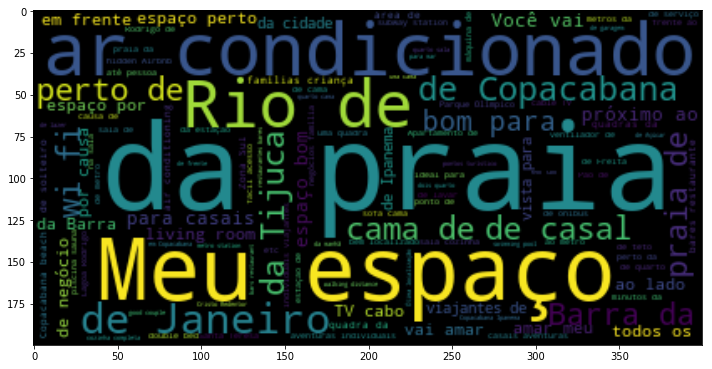

In [5]:
# lista de stopword
stopwords = set(STOPWORDS)

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black").generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

Veja como algumas palavras como "meu" e "da" estão destacados, porém não acrescentam informação relevante. Podemos melhorar esse *wordcloud* atualizando a nossa lista de stopwords.

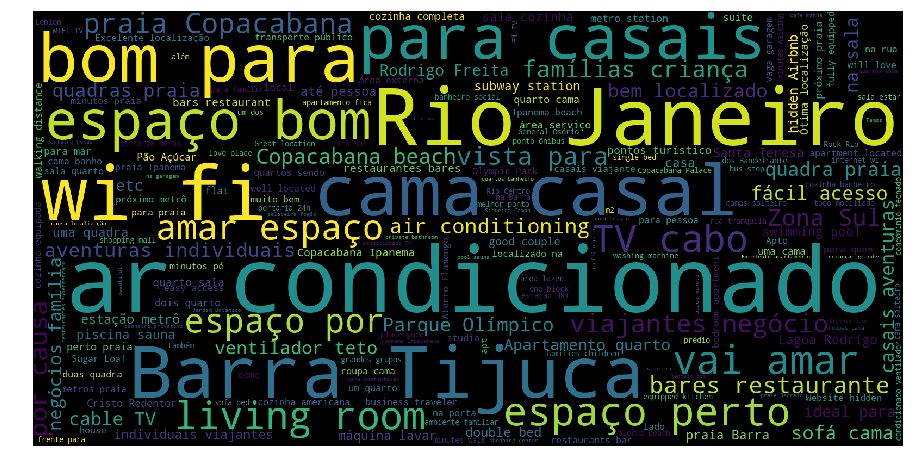

In [6]:
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os"])

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("airbnb_summary_wordcloud.png",)